In [2]:
import sys
sys.path += ['localretro', 'localretro/LocalTemplate']
from Retrosynthesis import load_trained_model, retrosnythesis
import torch

Using backend: pytorch
/home/shuanchen/anaconda3/envs/rdenv/lib/python3.6/site-packages/dgl/base.py:45: DGLWarning: Detected an old version of PyTorch. Suggest using torch>=1.5.0 for the best experience.
  return warnings.warn(message, category=category, stacklevel=1)


In [3]:
model_trained_on = 'USPTO_MIT'
device = torch.device('cuda:0')
model, graph_function, atom_templates, bond_templates, smarts2E, smarts2H = load_trained_model(model_trained_on, device)

In [ ]:
target_smiles = {'Lenalidomide': 'O=C1NC(=O)CCC1N3C(=O)c2cccc(c2C3)N',
                 'Salmeterol': 'OCc1cc(ccc1O)[C@H](O)CNCCCCCCOCCCCc2ccccc2',
                 '5-HT6 receptor ligand': 'O=S(=O)(Nc4cc2CCC1(CCC1)Oc2c(N3CCNCC3)c4)c5ccccc5F', 
                 'DDR1 kinase inhibitor ': 'O=C(Nc4cccc(C(=O)N3CCN(c1ccnc2[nH]ccc12)C3)c4)c5cccc(C(F)(F)F)c5'}

In [4]:
smiles = 'O=C1NC(=O)CCC1N3C(=O)c2cccc(c2C3)N'
results = retrosnythesis(smiles, model, graph_function, device, atom_templates, bond_templates, smarts2E, smarts2H, top_k = 20)

,SMILES,Edition,Score,Molecule
0,O=C1NC(=O)CCC1N3C(=O)c2cccc(c2C3)N,None,NaN,
1,O=C1CCC(N2Cc3c(cccc3[N+](=O)[O-])C2=O)C(=O)N1,[N;+0:1]>>O=[N;+1:1]-[O-] at 18,0.979457,
2,CC(C)(C)OC(=O)Nc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O,[N;+0:1]>>C-C(-C)(-C)-O-C(=O)-[N;+0:1] at 18,0.000944,
3,CC(=O)Nc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O,[N;+0:1]>>C-C(=O)-[N;+0:1] at 18,0.000484,
4,Nc1cc(Cl)cc2c1CN(C1CCC(=O)NC1=O)C2=O,[c;+0:1]>>Cl-[c;+0:1] at 13,0.000226,
5,Nc1c(Cl)ccc2c1CN(C1CCC(=O)NC1=O)C2=O,[c;+0:1]>>Cl-[c;+0:1] at 14,0.000218,
6,Nc1c(Br)ccc2c1CN(C1CCC(=O)NC1=O)C2=O,[c;+0:1]>>Br-[c;+0:1] at 14,0.000178,
7,Nc1cc(Br)cc2c1CN(C1CCC(=O)NC1=O)C2=O,[c;+0:1]>>Br-[c;+0:1] at 13,0.000171,
8,Nc1c(F)ccc2c1CN(C1CCC(=O)NC1=O)C2=O,[c;+0:1]>>F-[c;+0:1] at 14,0.000166,

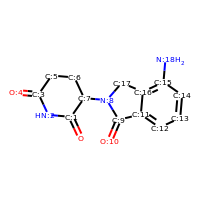
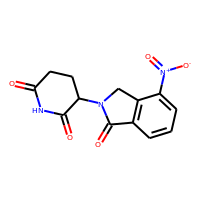
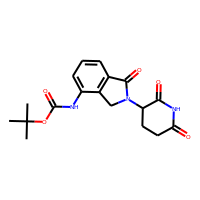
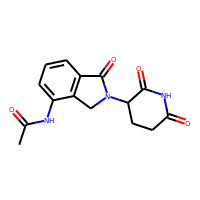
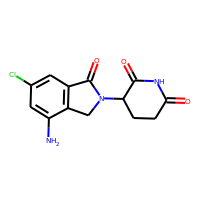
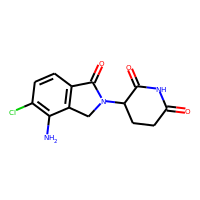
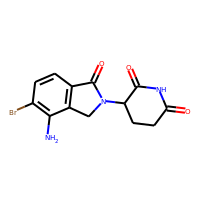
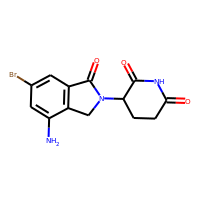
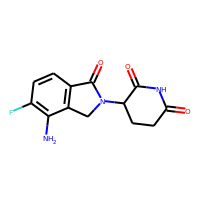

In [5]:
results